# Буканов Никита, Лабораторная работа №4

In [327]:
%matplotlib notebook

from scipy.optimize import linprog

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Задание №1

Предприятие выпускает скоропортящуюся продукцию двух видов. Данные о ее себестоимости, отпускных ценах и объемах реализации приведены в таблице:

|Вид продукции|Себестоимость ед. продукции|Отпускная цена в день изготовления|Отпускная цена позже|Объем реализации в теплую погоду|Объем реализации в холодную погоду|
|---|---|---|---|---|---|
|1| 0.8| 1.2| 0.3| 1000| 4000|
|2 |0.5 |0.8 |0.2 |6000 |1200|

На реализацию всей произведенной продукции расходуется 200 у.е. Определить ежедневный объем производства продукции по видам, обеспечивающий предприятию наибольший доход.


In [328]:
class product():
    def __init__(self, s1, s2, s3, s4, s5):
        self.s_price = s1
        self.price_1 = s2
        self.price_2 = s3
        self.sell_1 = s4
        self.sell_2 = s5
        
product_1 = product(0.8, 1.2, 0.3, 1000, 4000)
product_2 = product(0.5, 0.8, 0.2, 6000, 1200)
payment_matrix = np.zeros((2,2))

def profit(p, S, V):
    if V <= S:
        return V*(p.price_1 - p.s_price)
    else:
        return S*(p.price_1 - p.s_price)-(V-S)*(p.s_price - p.price_2)

for i, s in enumerate([product_1.sell_1, product_1.sell_2]):
    for j, t in enumerate([product_1.sell_1, product_1.sell_2]):
        payment_matrix[i][j] += profit(product_1, s, t)
for i, s in enumerate([product_2.sell_1, product_2.sell_2]):
    for j, t in enumerate([product_2.sell_1, product_2.sell_2]):
        payment_matrix[i][j] += profit(product_2, s, t)
        
pd.DataFrame(payment_matrix)

,0,1
0,2200.0,-740.0
1,-680.0,1960.0


In [329]:
c = [-1, -1]

In [330]:
x = linprog([-1, -1], payment_matrix, [1, 1])
x

     fun: -0.0014650283553875238
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([0.00070888, 0.00075614])

In [331]:
X = -x['x']/x['fun']

In [332]:
X

array([0.48387097, 0.51612903])

In [333]:
product_1.sell_1 * X[0] + product_1.sell_2 * X[1]

2548.3870967741937

In [334]:
product_2.sell_1 * X[0] + product_2.sell_2 * X[1]

3522.5806451612902

## Задание №2
На технологическую линию поступает сырье с малым или большим количеством примесей. Линия может работать в трех режимах. Доход предприятия от реализации единицы продукции, изготовленной из сырья первого вида при различных режимах работы технологической линии, составляет соответственно 2, 5 и 6 у.е., а из сырья второго вида — 5, 3 и 1 у.е. Сколько времени в каждом режиме должна работать технологическая линия, чтобы доход от реализации продукции был максимальным?

In [335]:
payment_matrix = np.array([[-2, -5, -6],
                           [-5, -3, -1]])

In [336]:
c = [1, 1, 1]
A = payment_matrix
b = [-1, -1]

x1_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)

x = linprog(c, A_ub=A, b_ub=b)
x

     fun: 0.2631578947368421
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([0.10526316, 0.15789474, 0.        ])

In [337]:
X = x['x']/x['fun']

In [338]:
X

array([0.4, 0.6, 0. ])

## Задание №3
В новом жилом районе создается СТОА (автосервис) для ремонта в стационарных условиях не более 8 тыс. автомобилей в год. Для упрощения модели примем, что в подобных районах поток заявок на ремонт выражается числами 2, 4, 6 и 8 тыс. заявок в год. Прибыль от одного акта ремонта составляет 90 у.е., потери, вызванные отказом в ремонте из-за недостатка мощностей — 50 у.е.; а убытки от простоя специалистов и оборудования при отсутствии заявок — 60 у.е. Дать обоснованные рекомендации о мощности станции. Оптимум выбирать по критериям Байеса, Вальда, Сэвиджа и Гурвица.

In [339]:
a = [2, 4, 6, 8]
payment_matrix = np.zeros((4,4))
for i, p_1 in enumerate(a):
    for j, p_2 in enumerate(a):
        payment_matrix[i][j] = np.minimum(p_1, p_2)*90
        payment_matrix[i][j] -= np.maximum(0, 60*(p_2 - p_1))
        payment_matrix[i][j] -= np.maximum(0, 50*(p_1 - p_2))
payment_matrix = payment_matrix.T
payment_matrix

array([[ 180.,   80.,  -20., -120.],
       [  60.,  360.,  260.,  160.],
       [ -60.,  240.,  540.,  440.],
       [-180.,  120.,  420.,  720.]])

### Критерий Байеса
минимизируем средний риск

In [340]:
res = payment_matrix.mean(axis=1)
res

array([ 30., 210., 290., 270.])

#### Рекомендуемая мощность:  {{a[np.argmax (res)]}}

### Критерий Вальда
выйгрыш минимален

In [341]:
res = payment_matrix.min(axis=1)
res 

array([-120.,   60.,  -60., -180.])

#### Рекомендуемая мощность:  {{a[np.argmax (res)]}}

### Критерий Сэвиджа
минимизируем максимальный риск

In [342]:
R = payment_matrix.max(axis=0) - payment_matrix
R

array([[  0., 280., 560., 840.],
       [120.,   0., 280., 560.],
       [240., 120.,   0., 280.],
       [360., 240., 120.,   0.]])

In [343]:
R.max(axis=1)

array([840., 560., 280., 360.])

#### Рекомендуемая мощность:  {{a[np.argmin (R)]}}

### Критерий Гурвица

<IPython.core.display.Javascript object>


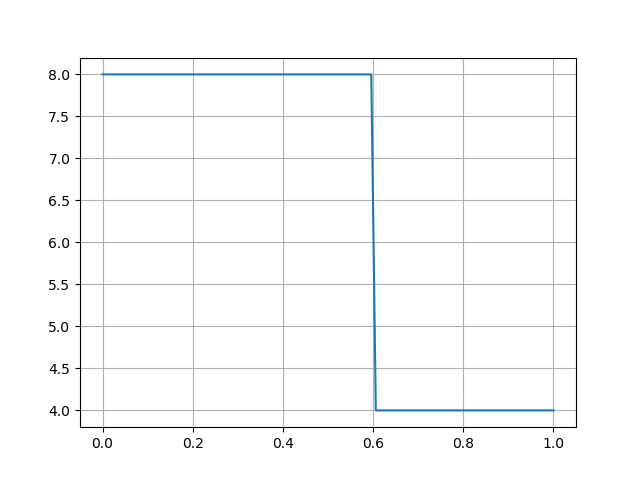

In [344]:
gamma = np.linspace(0,1,100).reshape(100,1)

res = gamma@payment_matrix.min(axis=1).reshape(1,4) + (1-gamma)@payment_matrix.max(axis=1).reshape(1,4)
a = np.array(a)
plt.plot(gamma, a[np.argmax(res, axis=1)])
plt.grid()

## Задание №4

Обыватель имеет возможность выделить 10 у.е. на формирование портфеля акций. Ценные бумаги можно приобрести у компаний А, В и С. Номинальная стоимость акции первой компании составляет 3 у.е., второй — 2 у.е., третьей — 5 у.е. На конец финансового года рынок ценных бумаг может оказаться в одном из двух состояний Z и W. Эксперты установили, что дивиденды компании А для состояния Z на конец года составят 10% от номинальной стоимости акции, а для состояния W — 15%; для компании В соответственно 8 и 12 %; для компании С — 14 и 8%.

Сформировать портфель акций обывателю, обеспечив ему возможно большую прибыль. Оптимум выбирать по критериям Байеса, Вальда, Сэвиджа и Гурвица.

In [345]:
payment_matrix = np.array([[0.10, 0.08, 0.14],
                           [0.15, 0.12, 0.08]])

### Критерий Байеса

In [346]:
res = payment_matrix.mean(axis=0)
res

array([0.125, 0.1  , 0.11 ])

In [347]:
np.argmax(res)

0

### Критерий Вальда

In [348]:
res = payment_matrix.min(axis=0)
res

array([0.1 , 0.08, 0.08])

In [349]:
np.argmax(res)

0

### Критерий Сэвиджа

In [350]:
payment_matrix.max(axis = 1).reshape(2,1)-payment_matrix

array([[0.04, 0.06, 0.  ],
       [0.  , 0.03, 0.07]])

In [351]:
R = payment_matrix.max(axis=0) - payment_matrix
R

array([[0.05, 0.04, 0.  ],
       [0.  , 0.  , 0.06]])

In [352]:
R.max(axis=0)

array([0.05, 0.04, 0.06])

In [353]:
np.argmin(R.max(axis=0))

1

### Критерий Гурвица

<IPython.core.display.Javascript object>


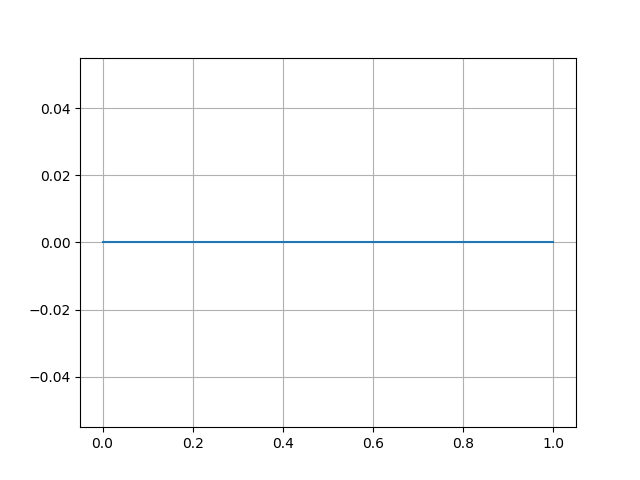

In [354]:
gamma = np.linspace(0,1,100).reshape(100,1)

res = gamma@payment_matrix.min(axis=0).reshape(1,3) + (1-gamma)@payment_matrix.max(axis=0).reshape(1,3)

a = np.array(a)
plt.figure()
plt.plot(gamma, np.argmax(res, axis=1))
plt.grid()